
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
df = pd.read_csv("tmdb-movies.csv")



In [3]:
#visualise the first five rows of your dataframe
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
df.sample()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6134,10372,tt0089110,0.393399,0,0,Ewoks: The Battle for Endor,Wilford Brimley|Warwick Davis|Aubree Miller|Si...,NaN,Jim Wheat|Ken Wheat,An adventure on a world beyond the stars.,...,"The army of the Marauders, led by by King Tera...",100,Fantasy|Science Fiction,Lucasfilm,11/24/85,32,5.3,1985,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

*As we can see this data contain total of 21 colmns and 10866 entries, there are missing data since not all of the colmns have the same number of entries.*

### Data Wrangling
*purpose: load in the data, check for cleanliness, and then trim and clean dataset for analysis*

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
columns_to_drop = df.iloc[:,[7, 9, 10]]


In [9]:
df.drop(columns_to_drop, axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   director              10822 non-null  object 
 8   overview              10862 non-null  object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

*We drop Columns (7, 9, 10) because we think it will be more useful while investigating this dataset for marketing purposes*

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Drop NaN values**

In [12]:
df.dropna(inplace=True)
df.info

<bound method DataFrame.info of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4               

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9771 non-null   int64  
 1   imdb_id               9771 non-null   object 
 2   popularity            9771 non-null   float64
 3   budget                9771 non-null   int64  
 4   revenue               9771 non-null   int64  
 5   original_title        9771 non-null   object 
 6   cast                  9771 non-null   object 
 7   director              9771 non-null   object 
 8   overview              9771 non-null   object 
 9   runtime               9771 non-null   int64  
 10  genres                9771 non-null   object 
 11  production_companies  9771 non-null   object 
 12  release_date          9771 non-null   object 
 13  vote_count            9771 non-null   int64  
 14  vote_average          9771 non-null   float64
 15  release_year        

*The dataset after droping NaN values its look trim and clean for analysis.*

In [14]:
df.genres.head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

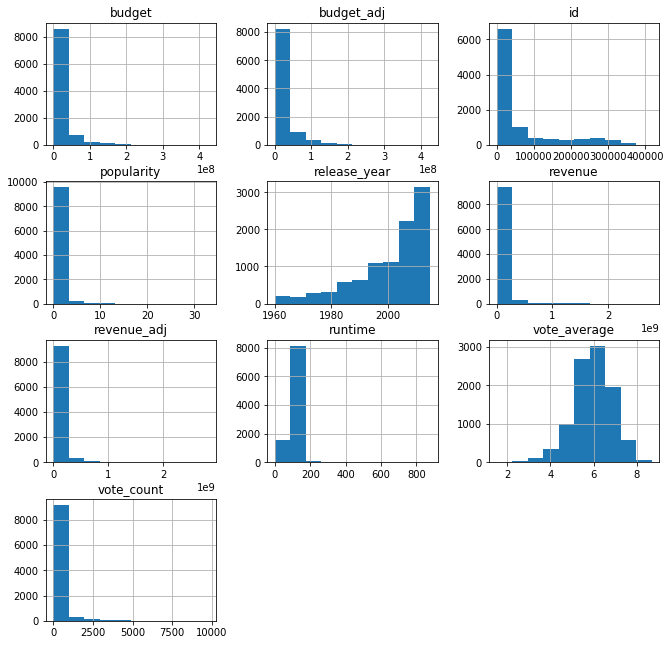

In [15]:
df.hist(figsize=(11, 11));

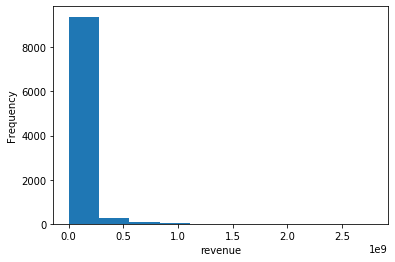

In [16]:
df['revenue'].plot(kind='hist');
plt.xlabel('revenue');

Text(0.5, 0, 'revenue')

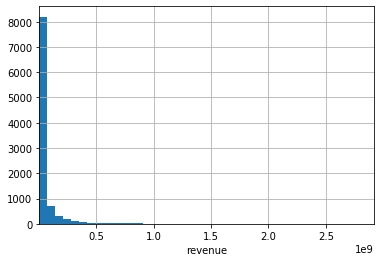

In [17]:
df.revenue.hist(bins = 40);
plt.xlim(5000000)
plt.xlabel('revenue')

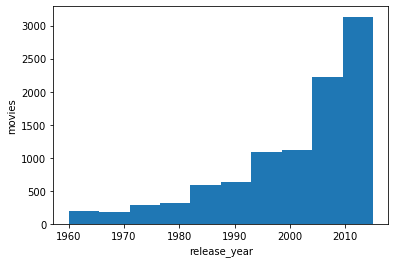

In [18]:
df['release_year'].plot(kind='hist');
plt.xlabel('release_year')
plt.ylabel('movies');

In [19]:
df['runtime'].value_counts()

90     468
95     316
100    302
93     294
97     284
      ... 
194      1
29       1
33       1
17       1
247      1
Name: runtime, Length: 223, dtype: int64

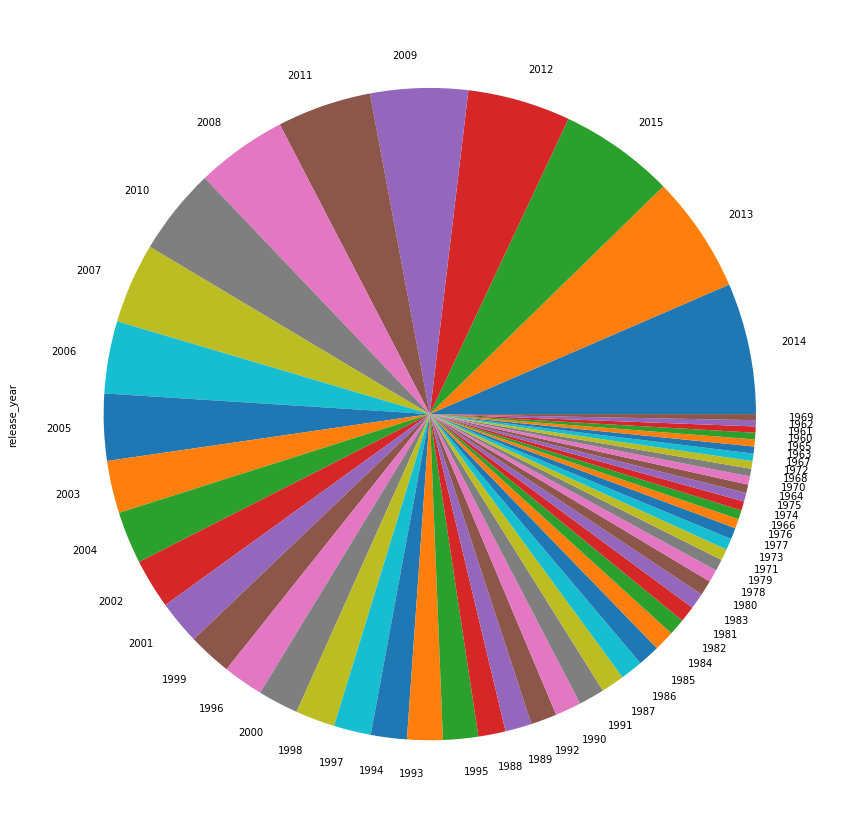

In [20]:
df['release_year'].value_counts().plot(kind='pie' , figsize=(15 , 15));

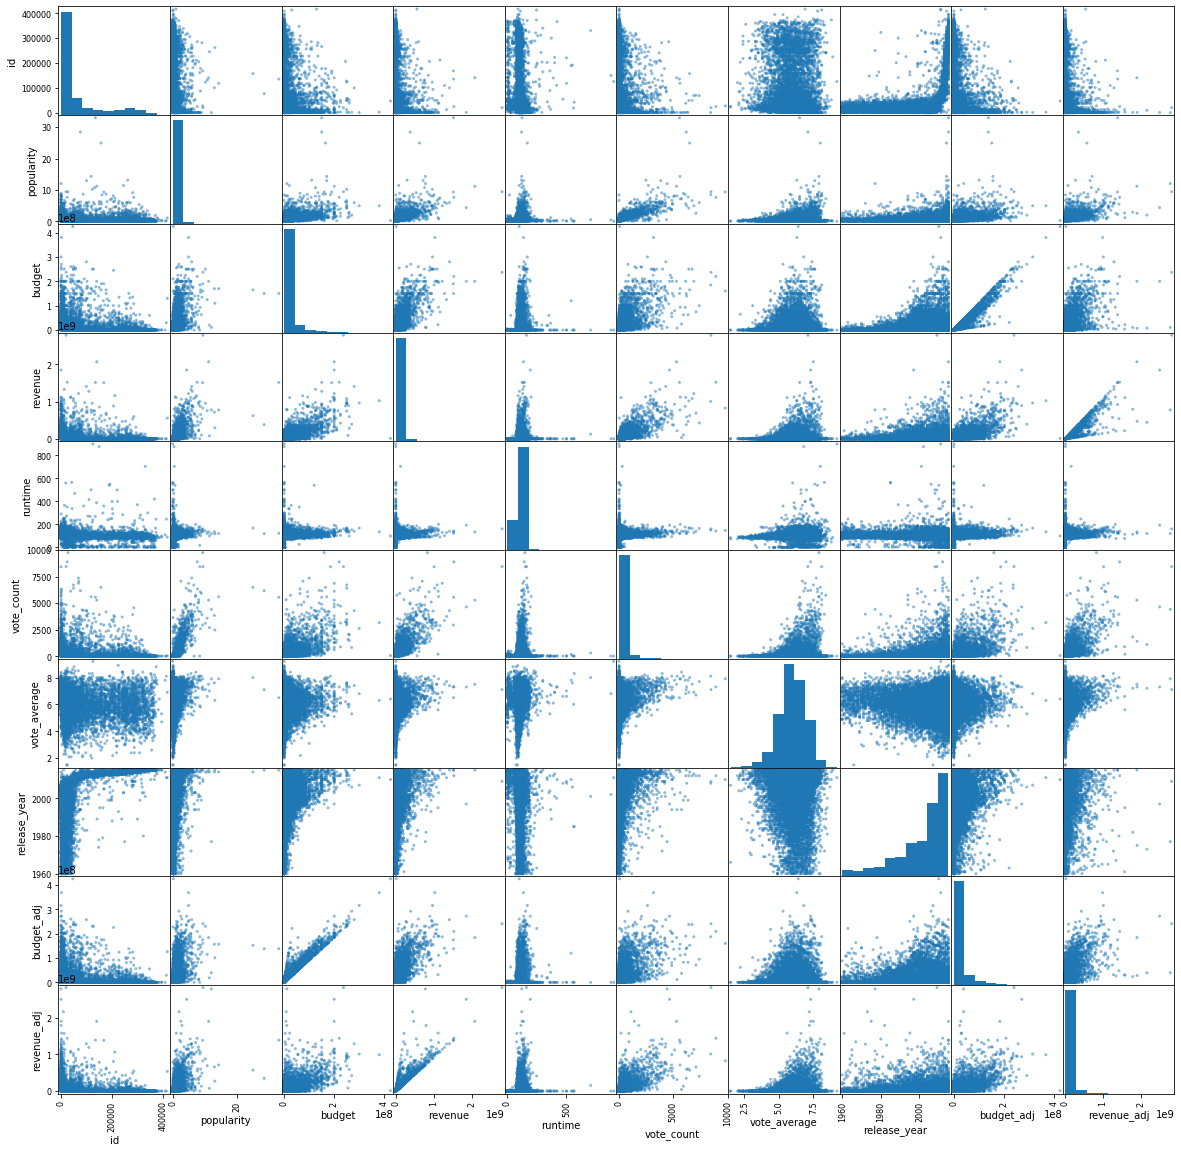

In [37]:
df_tmdb = pd.read_csv("tmdb-movies.csv")
pd.plotting.scatter_matrix(df_tmdb, figsize=(20, 20));

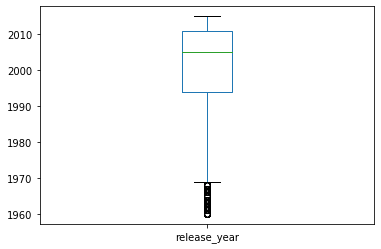

In [38]:
df['release_year'].plot(kind='box');

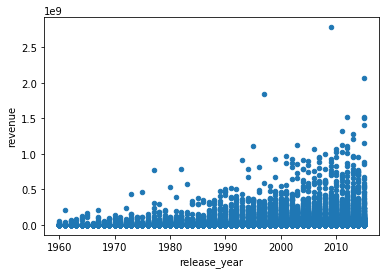

In [39]:
df_tmdb.plot(x='release_year', y='revenue', kind='scatter');

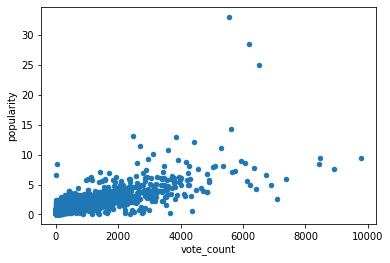

In [40]:
df_tmdb.plot(x='vote_count', y='popularity', kind='scatter');

### Exploratory Data Analysis


**Research Question 1** (Which genres are most popular from year to year?)

In [41]:
df.groupby(['release_year','genres'])['popularity'].mean()

release_year  genres                                
1960          Action|Adventure|Drama|History|Western    0.310398
              Action|Adventure|Western                  1.872132
              Action|Drama|Foreign|History|War          0.194948
              Action|Drama|History                      1.136943
              Action|Drama|History|War                  0.256779
                                                          ...   
2015          War|Action                                0.356519
              War|Adventure|Science Fiction             5.476958
              War|Drama                                 0.561032
              Western|Drama                             0.747541
              Western|Drama|Adventure|Thriller          9.110700
Name: popularity, Length: 5676, dtype: float64

**Create function**

In [42]:
genres = df.genres

In [43]:
def gen_object(genres): 
    genres = genres.apply(lambda x: x.split('|')) 
    genres = [genre[0] for genre in genres] 
    return(genres)

In [44]:
df = pd.read_csv("tmdb-movies.csv") 
columns_to_drop = df.iloc[:,[7, 9, 10]] 
df.drop(columns_to_drop, axis = 1, inplace = True) 
df.dropna(inplace=True)

**Research Question 2**  (the more movies produced the higher chance for success? )

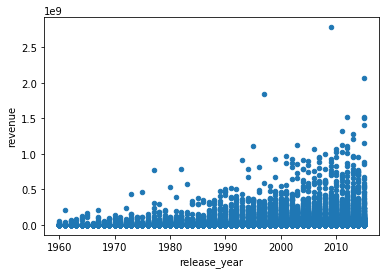

In [45]:
df_tmdb.plot(x='release_year', y='revenue', kind='scatter');

*As we can see from the scaatter here, the more movies being produced the higher chance for more movies to generate more revenue and succeed. Very few movie were produced in (1960) compare to (2010).*

**Research Question** 3 (Does the vote_count effect the popularity?)

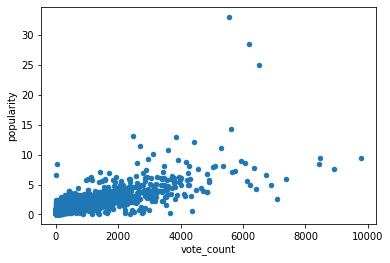

In [74]:
df_tmdb.plot(x='vote_count', y='popularity', kind='scatter');

*The vote_count doesn't have strong effect on the popularity of the movie* 


## Conclusions

In the investigation for this dataset we saw the association between the variables and how they have effect on each other, revene an release year do have postive strong effect on each other. Vote count and popularity doesn't seems to have that strong effect on one another.  

Limitations:
We had to drop the entries from 10865 to 9771 in order to look clean and trimed which is consider alot because there are alot of missing data. The budget is zero for some entries which may affect the results since it is extremly hard to make movie with zero budget. The data on some plots can be difficult to read such as in the box plot.


In [86]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0